### 11.13 첫 실험
- 일단 데이터세트 전부 number, loss 조정해서 돌리기

In [3]:
from model.mlp import MLP
from utils.dataset_load import CustomDataset
import numpy as np
import torch.nn as nn
import argparse
import os
import torch
import numpy as np
import pandas as pd
import utils.dataset_load as dl
import pdb
import random
from model.mlp import MLPClassifier
import utils.Function as Ft
import numpy as np
import pandas as pd
import os
import sys

import torch
from torch.utils.data import DataLoader
from torch import optim, nn
import torch.nn.functional as F
import torch.nn as nn

sys.path.append('/home/ppleeqq/IMvsAD/')
from utils.loss import *

from tqdm import tqdm
import time
from datetime import datetime
from utils.loss import *

epoch = 500
dataset = CustomDataset('2_annthyroid', '/data/home/ppleeqq/table_data/Classical/', 5, 1 )

device = torch.device(f'cuda:{0}' if torch.cuda.is_available() else 'cpu')


dataset = dataset
num_of_label_list =np.unique(dataset.train_y, return_counts=True)[1].tolist()
batch_size = 256

# import pdb
# pdb.set_trace()
model = MLP(feature = dataset.train_data.shape[1])
#criterion = _loss(gamma, alpha, beta, loss_type)
criterion = MFELoss(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_ = []
model.train()

train_dataloader = DataLoader(dataset.train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)
n = len(train_dataloader)
for epoch in tqdm(range(epoch)):

    running_loss = 0

    for X, y in train_dataloader:
        optimizer.zero_grad()
        
        y_hat = model(X)
        print(y_hat[0])
        loss = criterion(y_hat, y)
        loss.backward()
        # print(loss)
        optimizer.step()
        
        running_loss += loss.item()
    loss_.append(running_loss / n)

  0%|          | 0/500 [00:00<?, ?it/s]

tensor([0.5214], grad_fn=<SelectBackward0>)
fpe:  tensor(0.2674, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.2674, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5147], grad_fn=<SelectBackward0>)
fpe:  tensor(0.2624, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2345, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.4969, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5138], grad_fn=<SelectBackward0>)
fpe:  tensor(0.2594, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2440, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.5034, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5088], grad_fn=<SelectBackward0>)
fpe:  tensor(0.2572, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.2572, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5043], grad_fn=<SelectBackward0>)
fpe:  tensor(0.2539, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.2539, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5003], grad_fn=<Sel

  0%|          | 1/500 [00:00<04:06,  2.03it/s]

tensor(0.1798, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.4134], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1641, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1641, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3091], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1439, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2500, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3939, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3100], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1241, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.3938, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.5179, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1199, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1199, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1247, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1247, device='cuda:0

  1%|          | 3/500 [00:00<01:59,  4.15it/s]

fpe:  tensor(0.0856, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0856, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0707], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0766, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0766, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0751], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0702, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0702, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1426], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0779, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.5886, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.6665, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0820], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0625, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0625, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0971], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0716, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.7075, device='

  1%|          | 4/500 [00:01<01:48,  4.59it/s]

tensor([0.2014], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0996, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0996, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0971, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0971, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2213], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0987, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0987, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2173], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1035, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.6228, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.7263, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3020], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1114, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1114, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2232], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1080, device='cuda:0', grad_fn=<D

  1%|          | 5/500 [00:01<01:39,  4.96it/s]

tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1053, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.5535, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.6587, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2731], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1200, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1200, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2754], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1274, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1274, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1220, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1220, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3532], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1243, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1243, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3301], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1286, device='cuda:0', grad_fn=<D

  1%|          | 6/500 [00:01<01:36,  5.09it/s]

tensor([0.1644], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0843, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0843, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1717], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0879, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0879, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2019], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0902, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0902, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2709], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0844, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0844, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3106], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0798, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0798, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0839, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0839, device='cuda:0', grad_fn=<A

  1%|▏         | 7/500 [00:01<01:31,  5.38it/s]

tensor([0.1285], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0751, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0751, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1216], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0687, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0687, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0754, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0754, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1004], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0697, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0697, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1231], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0700, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0700, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0735, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0735, device='cuda:0', grad_fn=<A

  2%|▏         | 8/500 [00:01<01:36,  5.11it/s]

tensor([0.1075], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0620, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0620, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1439], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0635, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0635, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0756], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0610, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0610, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0783], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0621, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.4056, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.4677, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1846], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0708, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0708, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0734, device='cuda:0', grad_fn=<D

  2%|▏         | 9/500 [00:02<01:44,  4.71it/s]

tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0764, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0764, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1619], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0791, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0791, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2030], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0903, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0903, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0692, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0692, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1657], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0801, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.5701, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.6502, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1211], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0794, device='cuda:0', grad_fn=<D

  2%|▏         | 10/500 [00:02<01:42,  4.78it/s]

fpe:  tensor(0.0774, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0774, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0839, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0839, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1687], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0812, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0812, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1214], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0721, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0721, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2399], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0694, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0694, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0734, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0734, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<Sele

  2%|▏         | 11/500 [00:02<01:37,  5.00it/s]

tensor([0.1544], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0720, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.6867, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.7586, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1240], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0815, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.6322, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.7136, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0851], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0818, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0818, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2070], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0875, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0875, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2063], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0877, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0877, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1927], grad_fn=<Sel

  3%|▎         | 13/500 [00:02<01:25,  5.67it/s]

tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1117, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1117, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2558], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1045, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1045, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2624], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0954, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0954, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1756], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0935, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0935, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1854], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0916, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.5265, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.6181, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0904, device='cuda:0', grad_fn=<D

  3%|▎         | 14/500 [00:02<01:22,  5.93it/s]

tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0620, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0620, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0510], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0641, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0641, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1985], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0562, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0562, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0434], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0638, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0638, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0340], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0470, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.7028, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.7498, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0087], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0565, device='cuda:0', grad_fn=<D

  3%|▎         | 15/500 [00:02<01:19,  6.10it/s]

tensor([0.0604], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0660, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0660, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1289], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0701, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2500, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3201, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3534], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0752, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0752, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0225], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0734, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0734, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0830, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0830, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1639], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0716, device='cuda:0', grad_fn=<D

  3%|▎         | 16/500 [00:03<01:22,  5.85it/s]

tensor([0.0443], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0759, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0759, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2152], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0795, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.4251, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.5047, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0940, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0940, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1057, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2500, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3557, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1984], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1076, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1076, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3947], grad_fn=<Sel

  4%|▎         | 18/500 [00:03<01:23,  5.81it/s]

fpe:  tensor(0.0577, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0577, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0678, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0678, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0388], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0567, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2500, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3067, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0157], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0515, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0515, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0075], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0540, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0540, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0127], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0559, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.4610, device='

  4%|▍         | 20/500 [00:03<01:25,  5.63it/s]

tensor([0.0460], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0611, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.3544, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.4155, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0915], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0737, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0737, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1866], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0787, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0787, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0449], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0848, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0848, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.3609], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1004, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1004, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2327], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1029, device='cuda:0', grad_fn=<D

  4%|▍         | 21/500 [00:04<01:22,  5.78it/s]

tensor([0.1456], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0859, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0859, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.2565], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0820, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0820, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0786, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2971, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3757, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0547], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0760, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0760, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0804, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0804, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0684], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0740, device='cuda:0', grad_fn=<D

  4%|▍         | 22/500 [00:04<01:21,  5.90it/s]

tensor([6.4310e-05], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0534, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0534, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0647], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0577, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0577, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0523, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2500, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3023, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0529, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0529, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0083], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0525, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.5744, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.6270, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=

  5%|▍         | 23/500 [00:04<01:20,  5.90it/s]

tensor([0.0980], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0610, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2500, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3110, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0165], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0581, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0581, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0743, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0743, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0357], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0512, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0512, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0048], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0535, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0535, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0603], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0527, device='cuda:0', grad_fn=<D

  5%|▍         | 24/500 [00:04<01:23,  5.69it/s]

tensor([0.3715], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0642, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0642, device='cuda:0', grad_fn=<AddBackward0>)
tensor([6.9790e-06], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0614, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0614, device='cuda:0', grad_fn=<AddBackward0>)
tensor([3.1517e-05], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0531, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0531, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0517, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0517, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0273], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0516, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0516, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0035], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0407, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0407, device='cuda:0', gr

  5%|▌         | 25/500 [00:04<01:25,  5.57it/s]

tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1550, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1550, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1260], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1366, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1366, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0037], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1118, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.3433, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.4551, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0529], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1186, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.1186, device='cuda:0', grad_fn=<AddBackward0>)


  5%|▌         | 26/500 [00:05<01:56,  4.07it/s]

tensor([0.1481], grad_fn=<SelectBackward0>)
fpe:  tensor(0.1021, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2247, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3268, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0953, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0953, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0830], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0703, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0703, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0648, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0648, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0102], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0676, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0676, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0021], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0567, device='cuda:0', grad_fn=<D

  5%|▌         | 27/500 [00:05<02:10,  3.61it/s]

fpe:  tensor(0.0632, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0632, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0092], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0440, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0440, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0294], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0640, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.4188, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.4829, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0691, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2173, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.2865, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0101], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0711, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0711, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1894], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0755, device='

  6%|▌         | 28/500 [00:06<01:42,  4.62it/s]

tensor([0.0171], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0588, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0588, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.1940], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0652, device='cuda:0', grad_fn=<DivBackward0>)
fne :  tensor(0.2500, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.3152, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0742, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0742, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0241], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0529, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0529, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.0157], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0558, device='cuda:0', grad_fn=<DivBackward0>)
loss:  tensor(0.0558, device='cuda:0', grad_fn=<AddBackward0>)
tensor([0.5000], grad_fn=<SelectBackward0>)
fpe:  tensor(0.0610, device='cuda:0', grad_fn=<D

KeyboardInterrupt: 

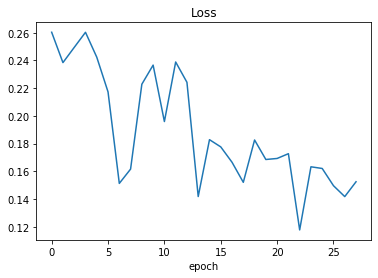

In [4]:
import matplotlib.pyplot as plt

plt.plot(loss_)
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

85.0359478739864
92.69466297913552
94.58422942254923
88.40477292532711
98.53909837848688
98.62862274518082


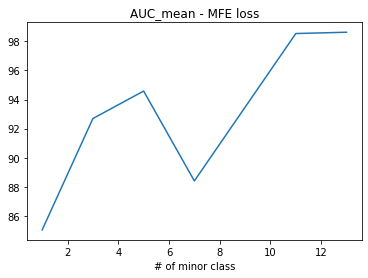

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

auc_list = []
minor_list = [1,3,5,7,11,13]
for i in minor_list:
    df = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    print(df['AUC_mean'].iloc[-1])
    auc_list.append(df['AUC_mean'].iloc[-1])

plt.plot(minor_list, auc_list)
plt.title('AUC_mean - MFE loss')
plt.xlabel('# of minor class')
plt.show()

In [34]:
[0]*5

[0, 0, 0, 0, 0]

In [47]:
import pandas as pd
import re

data = """
90.8(4.8) 80.3(11.8) 65.5(5.7) 78.9(10.8) 91.1(8.0) 91.4(7.7) 94.2(2.2) 84.5(7.6) 87.1(5.1) 97.3(1.1)
91.0(6.0) 79.5(11.1) 79.0(7.9) 88.0(10.2) 90.1(6.7) 93.1(4.2) 95.7(1.9) 88.9(6.4) 90.3(6.1) 95.7(2.3)
94.5(3.6) 83.5(8.2) 85.5(7.0) 92.3(5.2) 93.6(6.1) 94.7(4.1) 96.3(2.0) 91.4(3.8) 93.3(4.8) 97.2(1.5)
96.3(2.3) 89.2(5.5) 94.5(5.0) 96.4(3.8) 96.0(4.0) 96.3(4.1) 96.5(3.1) 91.8(2.7) 93.7(4.5) 98.0(1.2)
96.6(2.0) 88.4(6.1) 95.0(4.7) 97.8(2.7) 96.2(3.3) 97.4(1.6) 97.0(1.9) 92.3(2.8) 93.5(3.6) 97.7(1.7)
97.1(1.8) 91.3(5.8) 96.2(3.2) 97.1(3.0) 96.4(3.3) 97.9(1.2) 97.1(2.3) 92.6(3.5) 93.9(2.4) 98.2(1.0)
97.2(2.1) 91.1(4.5) 97.5(2.6) 97.3(3.1) 97.6(3.3) 97.6(2.1) 97.2(1.7) 92.6(3.5) 94.5(2.1) 98.4(0.7)
"""

# 각 행을 공백을 기준으로 나누고, 괄호 이후의 숫자 및 괄호를 제외한 숫자만 리스트에 담기
data_cleaned = [[re.sub(r'\([^)]*\)', '', num) for num in row.split()] for row in data.strip().split('\n')]
col_list = ['LR', 'SVM', 'RF', 'LGB', 'XGB', 'MLP', 'DeepSAD', 'DevNet', 'FeaWAD', 'PReNet']
# DataFrame 생성
df = pd.DataFrame(data_cleaned, columns = col_list, dtype=float)

# 결과 출력
print(df)

     LR   SVM    RF   LGB   XGB   MLP  DeepSAD  DevNet  FeaWAD  PReNet
0  90.8  80.3  65.5  78.9  91.1  91.4     94.2    84.5    87.1    97.3
1  91.0  79.5  79.0  88.0  90.1  93.1     95.7    88.9    90.3    95.7
2  94.5  83.5  85.5  92.3  93.6  94.7     96.3    91.4    93.3    97.2
3  96.3  89.2  94.5  96.4  96.0  96.3     96.5    91.8    93.7    98.0
4  96.6  88.4  95.0  97.8  96.2  97.4     97.0    92.3    93.5    97.7
5  97.1  91.3  96.2  97.1  96.4  97.9     97.1    92.6    93.9    98.2
6  97.2  91.1  97.5  97.3  97.6  97.6     97.2    92.6    94.5    98.4


/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_13-55-18.png


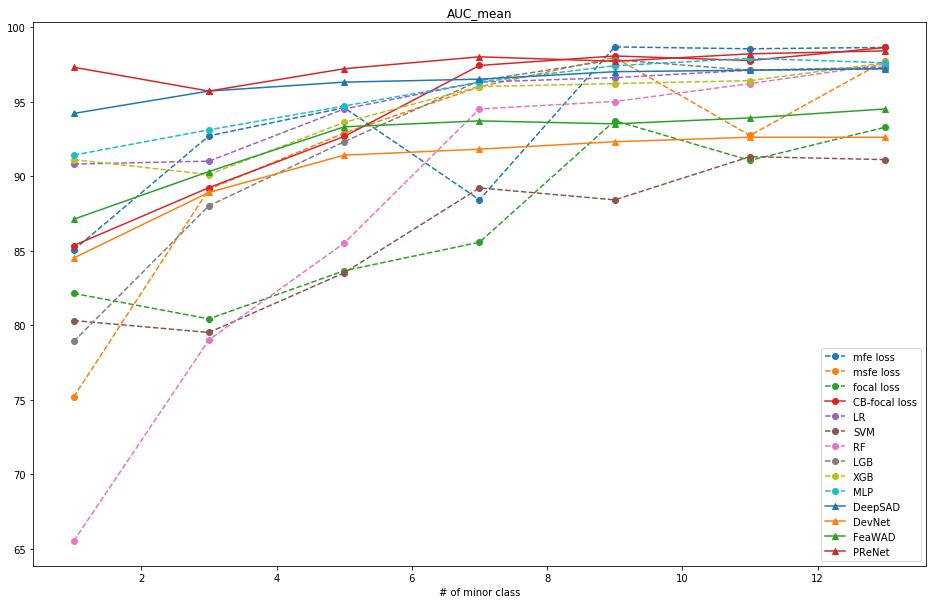

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

au = [65]*7
auc_list1 = []
auc_list2 = []
auc_list3 = []
auc_list4 = []
minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list2.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list3.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list4.append(df4['AUC_mean'].iloc[-1])

plt.figure(figsize=(16, 10))
plt.plot(minor_list, auc_list1, linestyle='--', label = 'mfe loss', marker = 'o')
plt.plot(minor_list, auc_list2, linestyle='--', label = 'msfe loss',marker = 'o')
plt.plot(minor_list, auc_list3, linestyle='--', label = 'focal loss',marker = 'o')
plt.plot(minor_list, auc_list4, linestyle='-', label = 'CB-focal loss',marker = 'o')


col_list1 = col_list[:6]
col_list2 = col_list[6:]

for col in col_list1:
    plt.plot(minor_list,df[col].tolist(),linestyle='--', label = col, marker = 'o')

for col in col_list2:
    plt.plot(minor_list,df[col].tolist(),linestyle='-', label = col, marker = '^')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()

/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_13-50-58.png


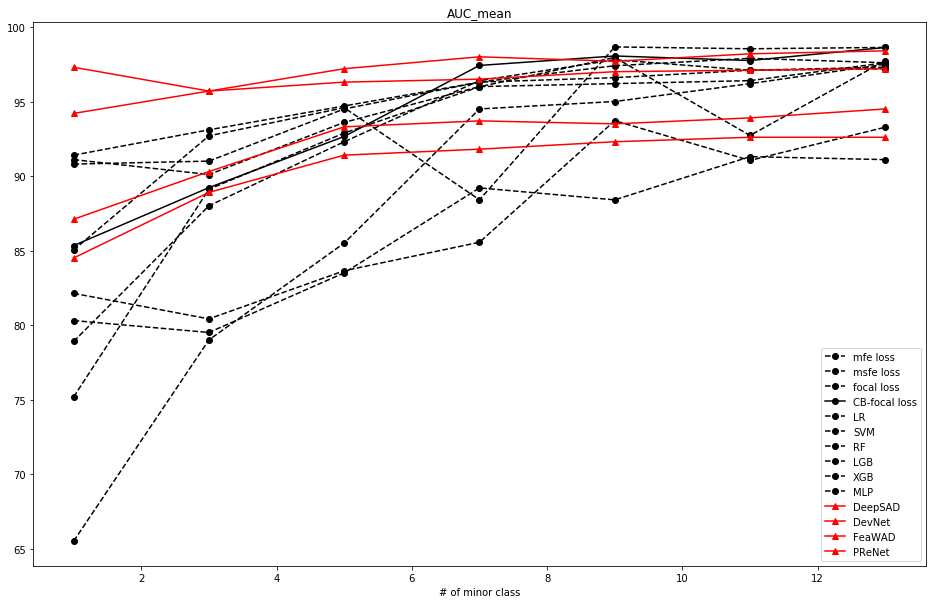

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

au = [65]*7
auc_list1 = []
auc_list2 = []
auc_list3 = []
auc_list4 = []
minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list2.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list3.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list4.append(df4['AUC_mean'].iloc[-1])

plt.figure(figsize=(16, 10))
plt.plot(minor_list, auc_list1, linestyle='--', label = 'mfe loss', marker = 'o', color='black')
plt.plot(minor_list, auc_list2, linestyle='--', label = 'msfe loss',marker = 'o', color='black')
plt.plot(minor_list, auc_list3, linestyle='--', label = 'focal loss',marker = 'o', color='black')
plt.plot(minor_list, auc_list4, linestyle='-', label = 'CB-focal loss',marker = 'o', color='black')

col_list1 = col_list[:6]
col_list2 = col_list[6:]

for col in col_list1:
    plt.plot(minor_list,df[col].tolist(),linestyle='--', label = col, marker = 'o', color='black')

for col in col_list2:
    plt.plot(minor_list,df[col].tolist(),linestyle='-', label = col, marker = '^', color='red')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()



[327.66928589897606, 351.440097989956, 363.7618113125053, 367.36505941192127, 388.38826442745767, 380.0568482481457, 388.2678575831606]
/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_14-05-08.png


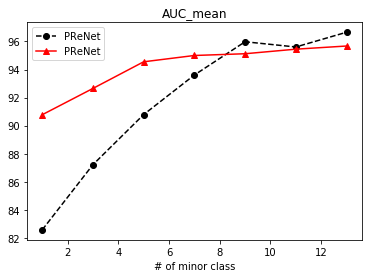

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


auc_list2 = []
auc_list3 = []
auc_list4 = []
minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    auc_list1 = []

    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list1.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list1.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list1.append(df4['AUC_mean'].iloc[-1])

    auc_list2.append(sum(auc_list1))

print(auc_list2)

for i in range(7):
    mean_im_method = (df.iloc[i,:6].sum() + auc_list2[i]) / 10
    auc_list3.append(mean_im_method)
    mean_ad_method = df.iloc[i,6:].mean()
    auc_list4.append(mean_ad_method)

plt.plot(minor_list,auc_list3,linestyle='--', label = im_method_mean, marker = 'o', color='black')
plt.plot(minor_list,auc_list4,linestyle='-', label = ad_method_mean, marker = '^', color='red')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()



/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_13-53-32.png


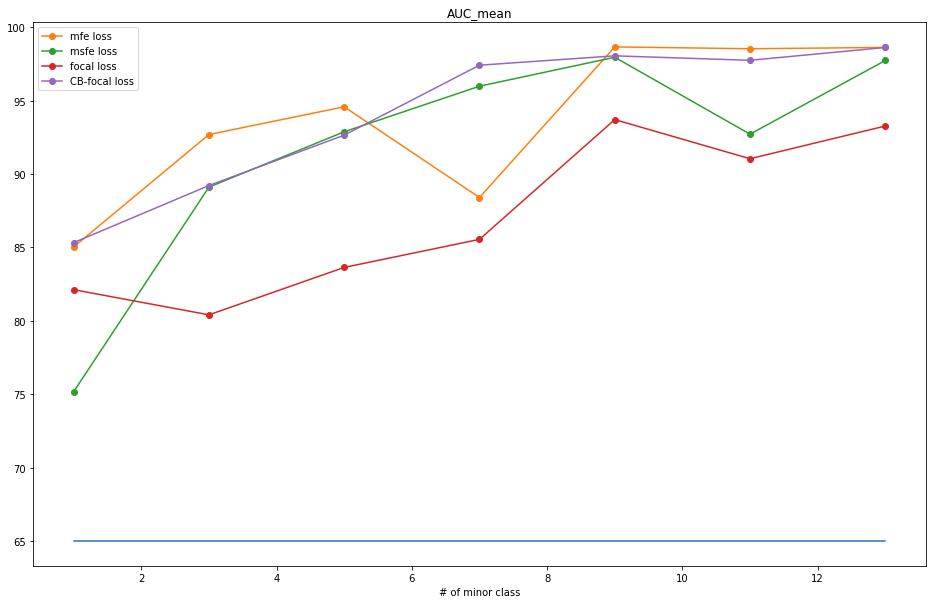

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

au = [65]*7
auc_list1 = []
auc_list2 = []
auc_list3 = []
auc_list4 = []

minor_list = [1,3,5,7,9,11,13]

for i in minor_list:
    df1 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_mfe_none_minor_{i}.csv')
    auc_list1.append(df1['AUC_mean'].iloc[-1])

    df2 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_msfe_none_minor_{i}.csv')
    auc_list2.append(df2['AUC_mean'].iloc[-1])

    df3 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    auc_list3.append(df3['AUC_mean'].iloc[-1])

    df4 = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-16/2_annthyroid_class-balanced_none_minor_{i}.csv')
    auc_list4.append(df4['AUC_mean'].iloc[-1])
    

plt.figure(figsize=(16, 10))
plt.plot(minor_list, au, linestyle='-')
plt.plot(minor_list, auc_list1, linestyle='-', label = 'mfe loss', marker = 'o')
plt.plot(minor_list, auc_list2, linestyle='-', label = 'msfe loss',marker = 'o')
plt.plot(minor_list, auc_list3, linestyle='-', label = 'focal loss',marker = 'o')
plt.plot(minor_list, auc_list4, linestyle='-', label = 'CB-focal loss',marker = 'o')

plt.legend()
plt.title('AUC_mean')
plt.xlabel('# of minor class')
now = datetime.now()
formatted = now.strftime('%H-%M-%S')
name = '/home/ppleeqq/IMvsAD/log/plot/anomaly_imbalanced_'+formatted+'.png'
plt.savefig(name)
print(name)
plt.show()


In [ ]:
for j in range(1,9):
    !taskset -c 0-9 python3.6 experiment.py -d 1 -l 0 -mi {j} -g 0 -e 50 --lr 0.005

device: args.cuda:0, dataset name : 2_annthyroid, model: mlp, sampling: none, minor_number : 1, loss: mfe
100%|███████████████████████████████████████████| 50/50 [00:08<00:00,  6.03it/s]
Figure(640x480)
2_annthyroid_mlp_none_mfe
tensor([[1.1160e-03],
        [1.4794e-03],
        [1.6002e-03],
        [1.2526e-03],
        [5.5185e-04],
        [7.8118e-04],
        [3.3493e-03],
        [5.5558e-03],
        [8.5581e-03],
        [1.0059e-02],
        [6.4110e-03],
        [6.0804e-03],
        [8.8941e-03],
        [3.3263e-03],
        [2.5561e-03],
        [1.8337e-03],
        [5.4698e-04],
        [5.5489e-03],
        [1.0425e-04],
        [9.9502e-04],
        [3.3623e-02],
        [3.3963e-03],
        [1.6725e-03],
        [1.9628e-02],
        [1.3502e-03],
        [2.9248e-02],
        [1.9781e-02],
        [1.7452e-03],
        [2.9903e-03],
        [3.4708e-03],
        [4.0712e-03],
        [1.0279e-03],
        [2.1591e-02],
        [5.2198e-03],
        [2.7672e-02],
 

82.12568704315755
80.41292650462124
83.64167649556403
85.55376010504578
93.7122524713556
91.04602718440455
93.27496607806923


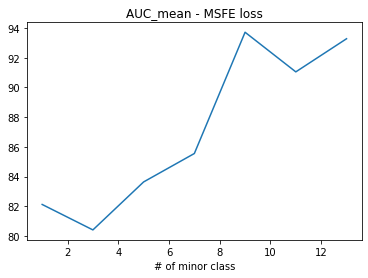

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

auc_list = []
minor_list = [1,3,5,7,9,11,13]
for i in minor_list:
    df = pd.read_csv(f'/home/ppleeqq/IMvsAD/save_result/2023-11-15/2_annthyroid_focal_none_minor_{i}.csv')
    print(df['AUC_mean'].iloc[-1])
    auc_list.append(df['AUC_mean'].iloc[-1])

plt.plot(minor_list, auc_list)
plt.title('AUC_mean - MSFE loss')
plt.xlabel('# of minor class')
plt.show()